# Simple Charts- Pie Charts, Bar Graphs, and Histograms

## Demo Instructions
**Create the following charts. All plots should have titles and appropriate labels sufficiently sized for readability and, when appropriate, x-axis and y-axis labels.**
1. [Simple pie chart](https://www.rdocumentation.org/packages/graphics/versions/3.5.0/topics/pie)
2. [Bar plot](https://www.rdocumentation.org/packages/graphics/versions/3.5.0/topics/barplot)
    * Vertical or slanted labels for each bar on the X axis
3. [Group bar plots with legend](http://ggplot2.tidyverse.org/reference/ggplot.html)
    * Optional: produce a stacked bar plot
4. [A histogram](https://www.rdocumentation.org/packages/graphics/versions/3.5.0/topics/hist)
    * Can be generated with random data (e.g. normally distributed)
    * Optional: show a line fitting the data distribution
    
# Solutions
## 1. Simple Pie Chart
When using pie(), remember:
* The first parameter is a vector of non-negative values that are the areas of the pie slices.
* Use *labels = (vector of Strings)* to add labels to the chart.

For more information on pie charts in R: [pie()](https://www.rdocumentation.org/packages/graphics/versions/3.5.0/topics/pie)


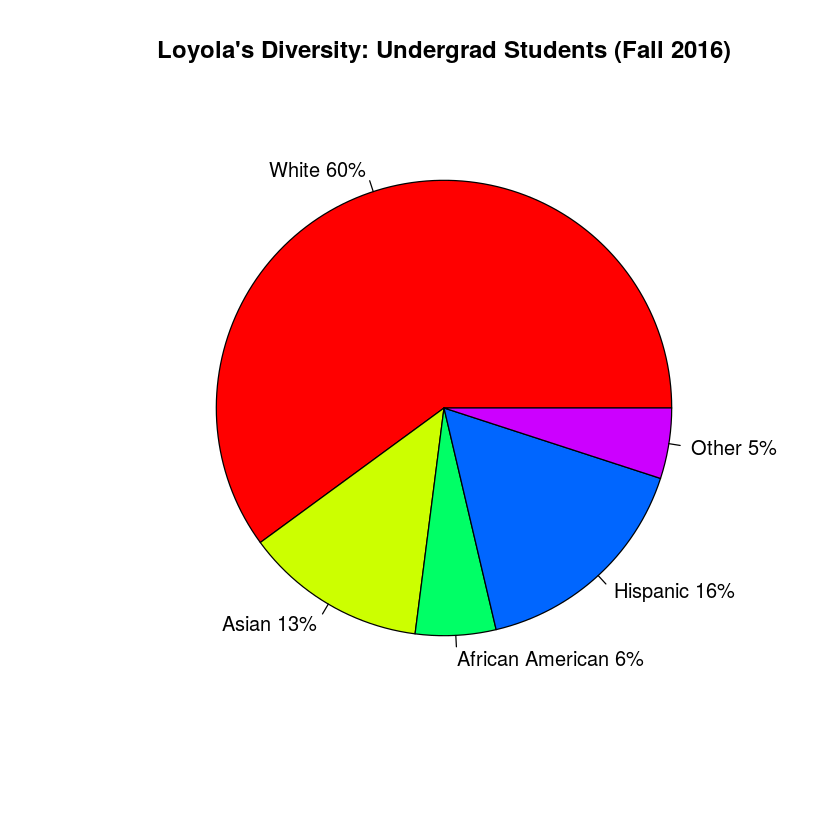

In [1]:
# Plot and label data.
slices <- c(60.0, 12.9, 5.7, 16.3, 5.0) 
lbls <- c("White", "Asian", "African American", "Hispanic", "Other")
pct <- round(slices/sum(slices)*100)

# Add percentages to the labels.
lbls <- paste(lbls, pct)

# Add the percent sign to the labels.
lbls <- paste(lbls,"%",sep="") # ad % to labels 

# Make labels, titles, and a color scheme.
pie(slices,labels = lbls, col=rainbow(length(lbls)),
    main="Loyola's Diversity: Undergrad Students (Fall 2016)")

## 2. Bar Plot

When using barplot(), remember:
* The first parameter is a vector whose values are the heights for each bar.
* *col = "color"* fills the bars a certain color.
* *border = "color"* outlines each bar a certain color.
* To add labels use *text(x, y, "text")* to where x is an x coordinate, y is a y coordinate, and "text" is the label.
    * *You may need to use guess and check to find the correct location for the labels.*
    
For more information on making a bar plot in R: [barplot()](https://www.rdocumentation.org/packages/graphics/versions/3.5.0/topics/barplot)

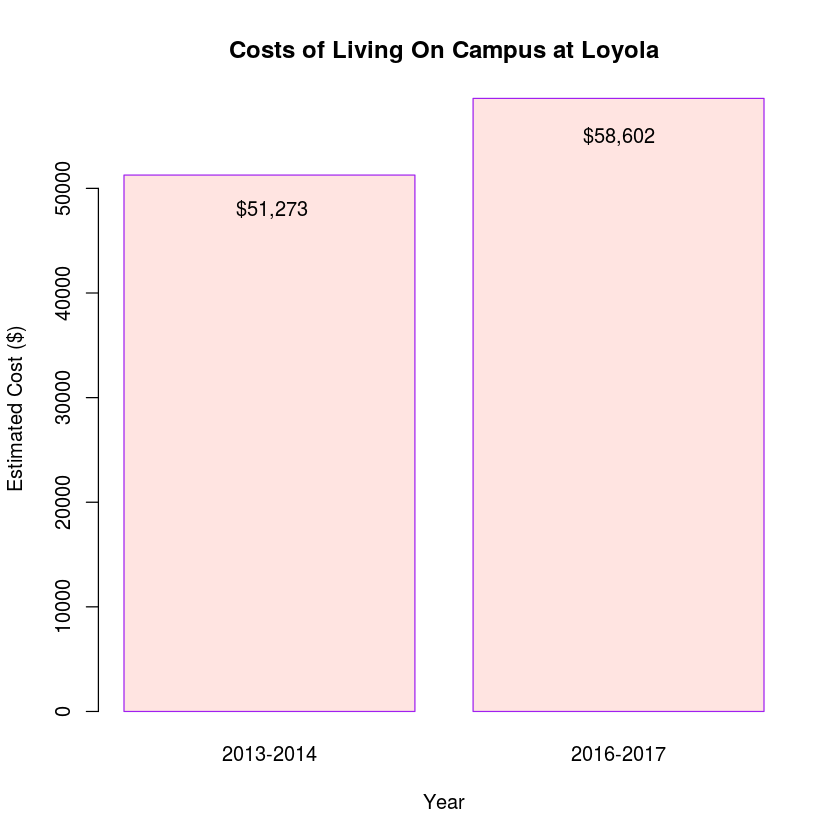

In [2]:
# Type in data points.
Price <- c(51273 , 58602)
Year <- c("2013-2014","2016-2017")

# Plot the chart.
barplot(Price,names.arg = Year, xlab = "Year", ylab = "Estimated Cost ($)", col = "mistyrose",
        main = "Costs of Living On Campus at Loyola", border = "purple")

# Add labels.
text(0.71, 48000, "$51,273")
text(1.9, 55000, "$58,602")

## 3. Group Bar Chart and Stacked Bar Chart

### Stacked Bar Chart
Creating a stacked bar chart is similar to a barplot, the only major difference is the first parameter of *barplot()* is a matrix instead of a vector. The columns of the matrix represent a bar on the barplot and the values of the columns give the heights of the stacked sub-bars that make-up the bar.
* Remember to add a legend which can be done by using *legend = (vector of strings)* 

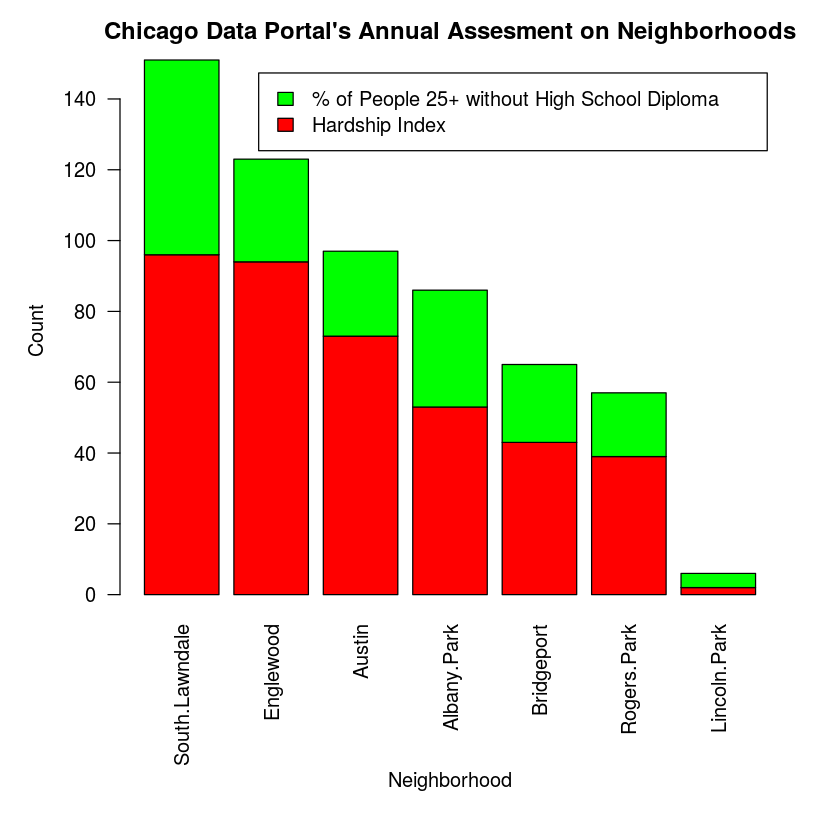

In [3]:
# Enter labels and data points. 
dat <- read.table(text = 
               "                   South-Lawndale    Englewood    Austin    Albany-Park    Bridgeport    Rogers-Park    Lincoln-Park  
    HardshipIndex                        96             94          73          53            43             39            02
    PercentAgedwithoutHighSchoolDiploma  55             29          24          33            22             18            04", 
        header = TRUE)

# Set up axis and legend.
par(mai = c(2,1,.5,.5))
barplot(as.matrix(dat), ylab="Count", xlab="", las = 2, col = c("red", "green"),
        main="Chicago Data Portal's Annual Assesment on Neighborhoods",
        legend = c("Hardship Index", "% of People 25+ without High School Diploma"))
mtext("Neighborhood", side = 1, line = 7)


### Group Bar Chart with Legend
You can create a group bar chart using *beside=TRUE* in the barplot() function. You may need to reorder the data in the matrix to be in proper form for the barplot() function. 

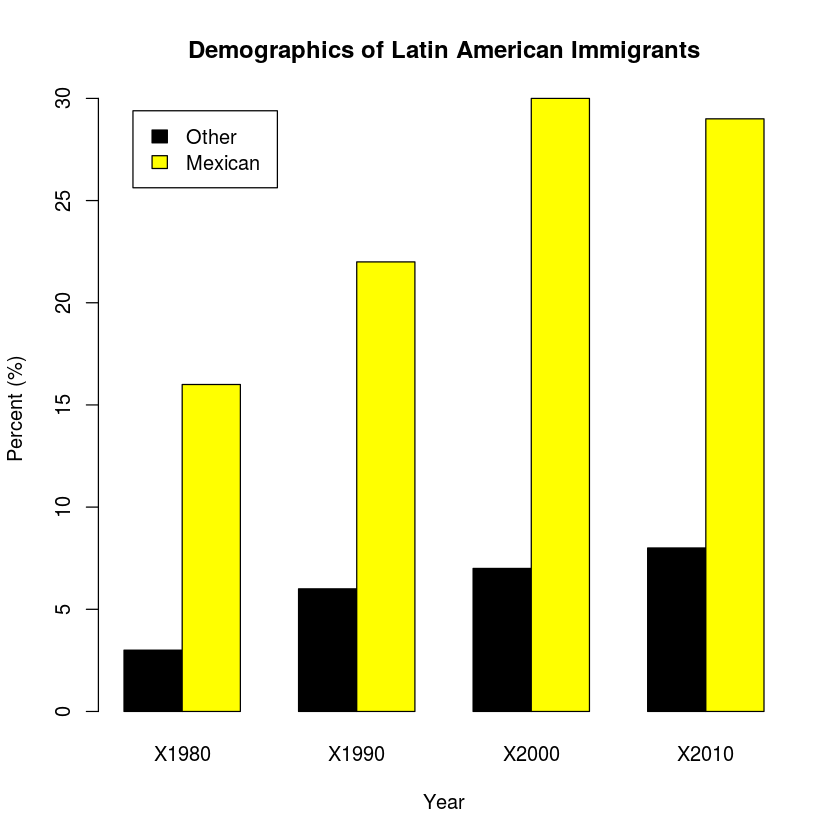

In [4]:
Immigration <- read.table(header=TRUE, text='
            1980 1990 2000 2010
    Other    3     6   7    8
    Mexican  16   22   30   29')

barplot(as.matrix(Immigration), ylab="Percent (%)", xlab="Year", 
        main="Demographics of Latin American Immigrants", beside = TRUE, col = c("black", "yellow"))
legend("topleft", inset = c(0.05,0.02),
       legend = c("Other", "Mexican"), 
       fill = c("black", "yellow"))

Another way to make a group bar chart is to install and use the package [ggplot2](http://r-statistics.co/Complete-Ggplot2-Tutorial-Part1-With-R-Code.html). You only need to do this once. 

In [5]:
# Install the necessary package.   
install.packages("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Again, this will use a matrix to create the plot. Use this framework when creating a plot with *ggplot()* and edit the matrix (Immigration), and update the parameters in ggplot to correspond to the changes you made in the matrix. Eg., if you change the header *Percent* to *Population* make sure to change *Percent* to *Population* in the ggplot() function. 

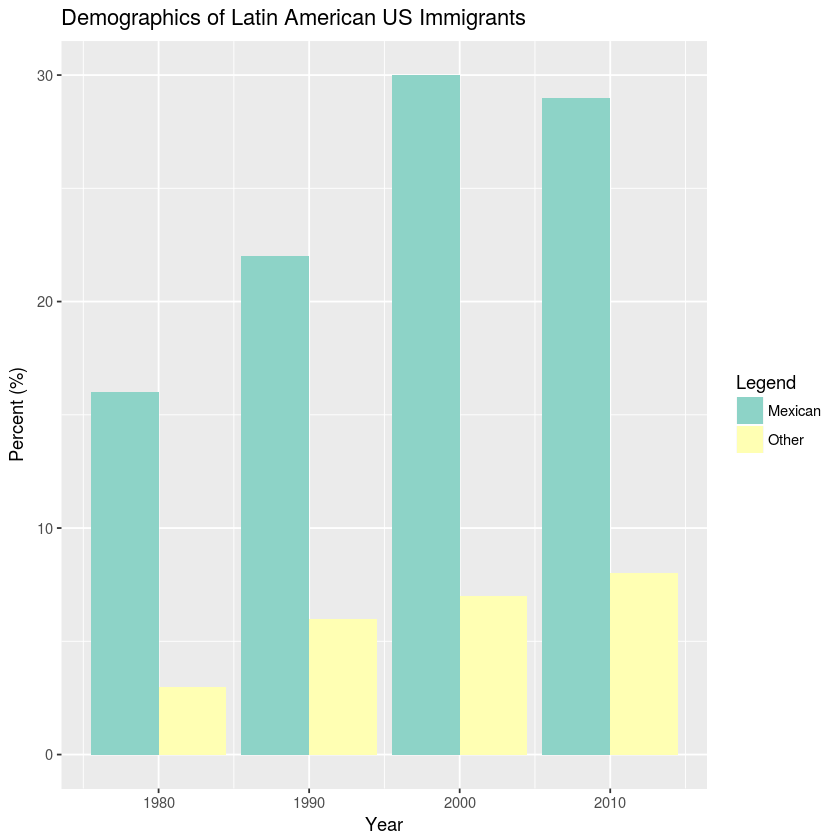

In [6]:
library(ggplot2)
Immigration <- read.table(
header=TRUE, text='Legend        Year Percent
    1  Other         1980       3
    2  Mexican       1980      16
    3  Other         1990       6
    4  Mexican       1990      22
    5  Other         2000       7
    6  Mexican       2000      30
    7  Other         2010       8
    8  Mexican       2010      29')

ggplot(Immigration,  aes(Year, Percent, fill = Legend))  +
    geom_bar(stat="identity", position = "dodge") + 
    scale_fill_brewer(palette = "Set3") + 
    labs(title="Demographics of Latin American US Immigrants", y="Percent (%)")

## 4. Histogram
To create a histogram in R, use [hist()](https://www.rdocumentation.org/packages/graphics/versions/3.5.0/topics/hist). Remember:
* The first parameter is a vector of values for which a histogram is desired
* *breaks=(vector of values)* makes the breakpoints in the histogram equal to the values in the vector
    * There are other input methods for break which describe different ways for the histogram to be divided
* If *prob=TRUE* then the histogram shows the probability of getting within a certain range and has a total area of one
    * If *prob=FALSE* then the histogram shows the frequency of the inputted values

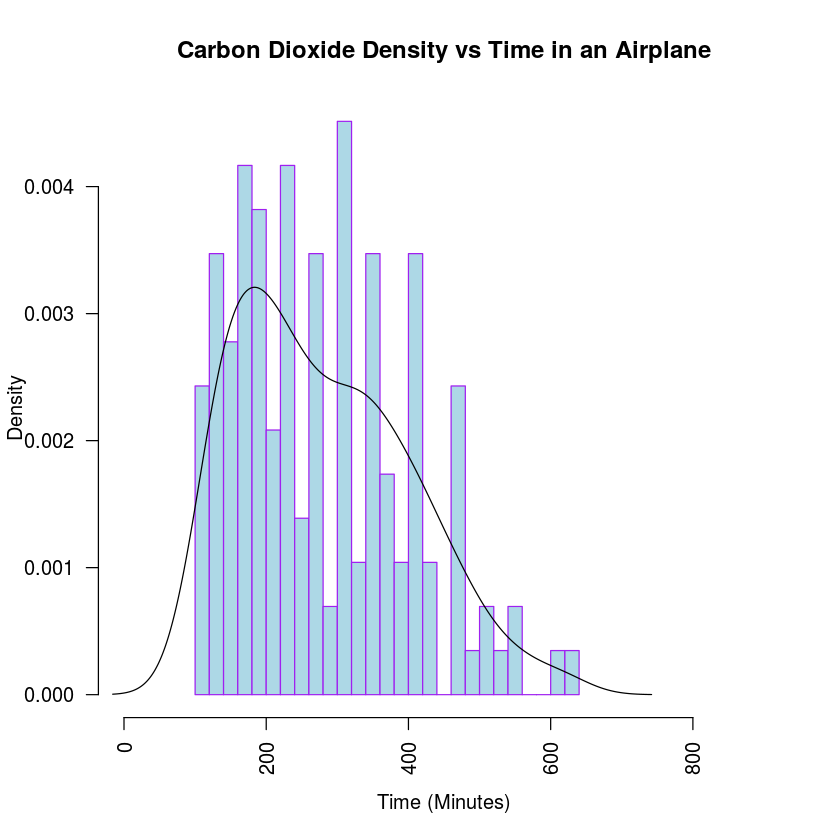

In [7]:
hist(AirPassengers, 
     main="Carbon Dioxide Density vs Time in an Airplane", 
     xlab="Time (Minutes)", 
     border="purple", 
     col="lightblue", 
     xlim=c(0,900),
     las=2, 
     breaks=20, 
     prob = TRUE)

lines(density(AirPassengers))